# Malaysia Car List Price
Objective: Build a machine learning model to accurately predict the market price of used cars in Malaysia based on vehicle attributes and market conditions.
<br>
<br>
Target: Price

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Loading and Overview

In [174]:
# load raw dataset
df = pd.read_csv('Malaysia_Final_CarList_Compiled.csv')
df.head()

,Desc,Link,Make,Model,Year,Engine.Cap,Transm,Mileage,Color,Car.Type,Updated,Price
0,2015 Perodua Myvi 1.5 S.E WITH CRAZY DISKAUN U...,/new-cars/2521373/2015-perodua-myvi-1-5-s-e-wi...,Perodua,Myvi,2015,1495cc,Automatic,NaN,Others,NewCar,2015-12-12,47468
1,2015 Perodua Myvi 1.5 ADVANCE WITH CRAZY DISKA...,/new-cars/2519379/2015-perodua-myvi-1-5-advanc...,Perodua,Myvi,2015,1495cc,Automatic,NaN,Others,NewCar,2015-12-12,55668
2,2015 Perodua Alza 1.5 (A) SE WITH DISKAUN UP T...,/new-cars/2519365/2015-perodua-alza-1-5-a-se-w...,Perodua,Alza,2015,1495cc,Automatic,NaN,Others,NewCar,2015-12-12,56132
3,2015 Perodua Myvi 1.5 S.E WITH CRAZY DISKAUN U...,/new-cars/2121602/2015-perodua-myvi-1-5-s-e-wi...,Perodua,Myvi,2015,1495cc,Automatic,NaN,Others,NewCar,2015-12-12,47468
4,2015 Perodua Alza 1.5 Advance Wagon,/new-cars/2611991/2015-perodua-alza-1-5-advanc...,Perodua,Alza,2015,1495cc,Automatic,NaN,Red,NewCar,2015-12-12,65000


In [175]:
# remove uneccesary columns
df = df.drop(columns=['Desc', 'Link'])
df

,Make,Model,Year,Engine.Cap,Transm,Mileage,Color,Car.Type,Updated,Price
0,Perodua,Myvi,2015,1495cc,Automatic,NaN,Others,NewCar,2015-12-12,47468
1,Perodua,Myvi,2015,1495cc,Automatic,NaN,Others,NewCar,2015-12-12,55668
2,Perodua,Alza,2015,1495cc,Automatic,NaN,Others,NewCar,2015-12-12,56132
3,Perodua,Myvi,2015,1495cc,Automatic,NaN,Others,NewCar,2015-12-12,47468
4,Perodua,Alza,2015,1495cc,Automatic,NaN,Red,NewCar,2015-12-12,65000
...,...,...,...,...,...,...,...,...,...,...
5995,Perodua,Viva,2007,989cc,Automatic,22500.0,Silver,UsedCar,2015-04-06,18000
5996,Perodua,Rusa,1997,1590cc,Manual,102500.0,Maroon,UsedCar,2015-05-12,8000
5997,Perodua,Myvi,2014,1495cc,Automatic,22500.0,White,UsedCar,2015-06-16,45500
5998,Perodua,Myvi,2014,1298cc,Automatic,17500.0,Silver,UsedCar,2015-08-06,42000


In [176]:
# check structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Make        6000 non-null   object 
 1   Model       6000 non-null   object 
 2   Year        6000 non-null   int64  
 3   Engine.Cap  6000 non-null   object 
 4   Transm      6000 non-null   object 
 5   Mileage     3000 non-null   float64
 6   Color       6000 non-null   object 
 7   Car.Type    6000 non-null   object 
 8   Updated     6000 non-null   object 
 9   Price       6000 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 468.9+ KB


In [177]:
df.describe(include='all')

,Make,Model,Year,Engine.Cap,Transm,Mileage,Color,Car.Type,Updated,Price
count,6000,6000,6000.000000,6000,6000,3000.000000,6000,6000,6000,6000.000000
unique,1,10,NaN,12,2,NaN,18,2,399,NaN
top,Perodua,Myvi,NaN,-,Automatic,NaN,Others,NewCar,2014-06-15,NaN
freq,6000,3000,NaN,1482,4042,NaN,2843,3000,947,NaN
mean,NaN,NaN,2011.191833,NaN,NaN,79661.648000,NaN,NaN,NaN,33959.385333
std,NaN,NaN,3.934753,NaN,NaN,44520.370966,NaN,NaN,NaN,14870.941685
min,NaN,NaN,1994.000000,NaN,NaN,22.000000,NaN,NaN,NaN,3000.000000
25%,NaN,NaN,2009.000000,NaN,NaN,52500.000000,NaN,NaN,NaN,22000.000000
50%,NaN,NaN,2014.000000,NaN,NaN,72500.000000,NaN,NaN,NaN,34346.000000
75%,NaN,NaN,2014.000000,NaN,NaN,97500.000000,NaN,NaN,NaN,45000.000000


In [178]:
# check numerical columns
numeric_cols = df.select_dtypes(include=np.number)
numeric_cols.columns

Index(['Year', 'Mileage', 'Price'], dtype='object')

In [179]:
# check categorical columns
categorical_cols = df.select_dtypes(exclude=np.number)
categorical_cols.columns

Index(['Make', 'Model', 'Engine.Cap', 'Transm', 'Color', 'Car.Type',
       'Updated'],
      dtype='object')

# Data Cleaning

In [180]:
# check unique values for each categorical columns
for col in categorical_cols:
    print(f"\n{col}:\n{df[col].unique()}\n")


Make:
['Perodua']


Model:
['Myvi' 'Alza' 'Axia' 'Viva' 'Kancil' 'Kelisa' 'Kenari' 'Rusa' 'Kembara'
 'Nautica']


Engine.Cap:
['1495cc' '1298cc' '998cc' '1500cc' '1000cc' '1300cc' '-' '847cc' '989cc'
 '659cc' '1296cc' '1590cc']


Transm:
['Automatic' 'Manual']


Color:
['Others' 'Red' 'White' 'Silver' 'Green' 'Gold' 'Blue' 'Purple' 'Orange'
 'Yellow' 'Maroon' 'Black' 'Pink' 'Grey' 'Bronze' 'Beige' 'Magenta'
 'Brown']


Car.Type:
['NewCar' 'UsedCar']


Updated:
['2015-12-12' '2015-12-11' '2015-12-10' '2015-12-09' '2015-12-08'
 '2015-12-07' '2015-12-06' '2015-12-05' '2015-12-04' '2015-12-03'
 '2015-12-01' '2015-11-28' '2015-11-27' '2015-11-25' '2015-11-24'
 '2015-11-21' '2015-11-20' '2015-11-18' '2015-11-17' '2015-11-15'
 '2015-11-14' '2015-11-13' '2015-11-12' '2015-11-11' '2015-11-09'
 '2015-11-08' '2015-11-07' '2015-11-06' '2015-11-05' '2015-11-04'
 '2015-11-03' '2015-11-02' '2015-11-26' '2015-11-01' '2015-10-31'
 '2015-10-29' '2015-10-28' '2015-10-27' '2015-10-24' '2015-10-23'
 '2015

**All categorical features have unique values**

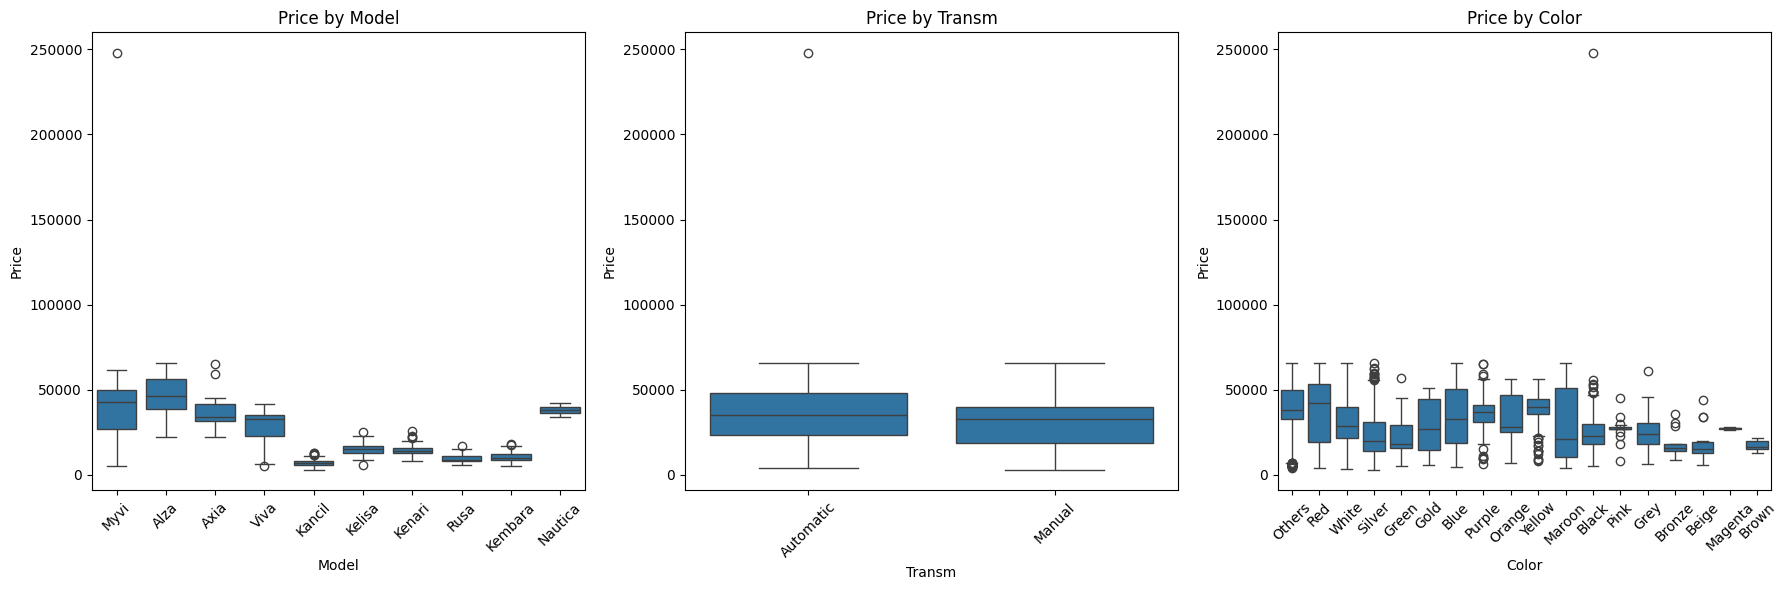

In [181]:
# List of categorical features
cat_features = ['Model', 'Transm', 'Color']  # adjust as needed

# Limit brand to top N to avoid clutter
top_brands = df['Model'].value_counts().head(10).index
df_top = df[df['Model'].isin(top_brands)]

fig, axes = plt.subplots(1, len(cat_features), figsize=(6 * len(cat_features), 6))

if len(cat_features) == 1:
    axes = [axes]

for i, col in enumerate(cat_features):
    if col == 'Model':
        data = df_top
    else:
        data = df
    
    sns.boxplot(data=data, x=col, y='Price', ax=axes[i])
    axes[i].set_title(f'Price by {col.title()}')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel('Price')

plt.tight_layout()
plt.show()

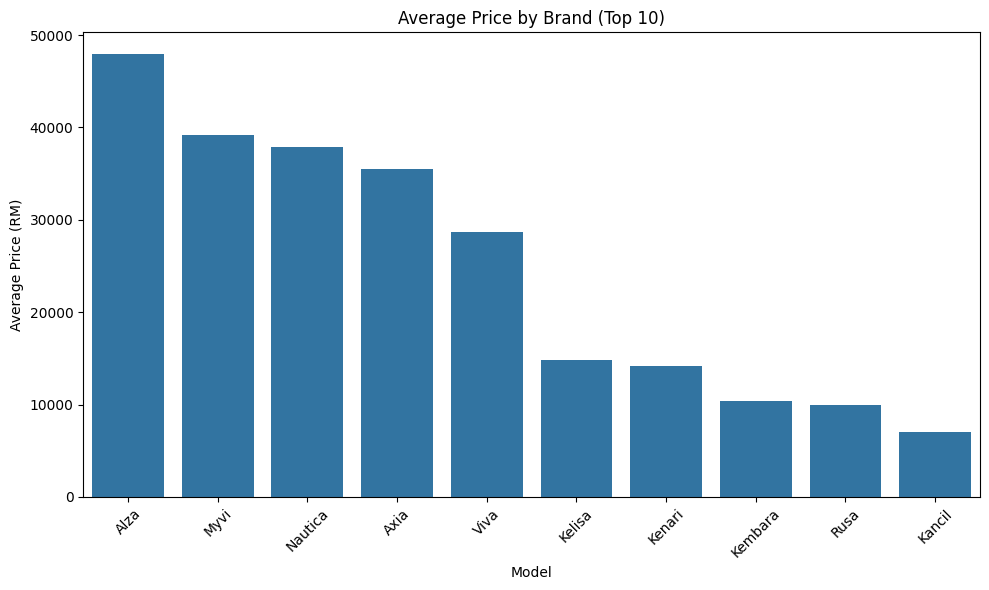

In [182]:
# average price by brand (top 10)
avg_price_by_brand = df_top.groupby('Model')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_brand.index, y=avg_price_by_brand.values)
plt.title('Average Price by Brand (Top 10)')
plt.ylabel('Average Price (RM)')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [183]:
# update using datetime standard format
df['Updated'] = pd.to_datetime(df['Updated'])

In [184]:
# Use Label Encoder for categorical columns
from sklearn.preprocessing import LabelEncoder

# Initialize and fit LabelEncoder
encoders = {}
for col in ['Model', 'Engine.Cap', 'Transm', 'Color', 'Car.Type']:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
  encoders[col] = le

df.head(20)

,Make,Model,Year,Engine.Cap,Transm,Mileage,Color,Car.Type,Updated,Price
0,Perodua,6,2015,5,0,NaN,11,0,2015-12-12,47468
1,Perodua,6,2015,5,0,NaN,11,0,2015-12-12,55668
2,Perodua,0,2015,5,0,NaN,11,0,2015-12-12,56132
3,Perodua,6,2015,5,0,NaN,11,0,2015-12-12,47468
4,Perodua,0,2015,5,0,NaN,14,0,2015-12-12,65000
5,Perodua,6,2015,3,0,NaN,16,0,2015-12-12,43862
6,Perodua,1,2015,11,0,NaN,11,0,2015-12-12,39637
7,Perodua,6,2015,3,1,NaN,11,0,2015-12-12,40862
8,Perodua,1,2015,11,1,NaN,11,0,2015-12-12,36637
9,Perodua,1,2015,11,1,NaN,11,0,2015-12-12,24437


In [185]:
# see the le mapping for each columns
for col, le in encoders.items():
  mapping = dict(zip(le.classes_, le.transform(le.classes_)))
  print('______')
  print(f"Mapping for {col}:")
  for i, label in enumerate(le.classes_):
    print(f"{i} → {label}")

______
Mapping for Model:
0 → Alza
1 → Axia
2 → Kancil
3 → Kelisa
4 → Kembara
5 → Kenari
6 → Myvi
7 → Nautica
8 → Rusa
9 → Viva
______
Mapping for Engine.Cap:
0 → -
1 → 1000cc
2 → 1296cc
3 → 1298cc
4 → 1300cc
5 → 1495cc
6 → 1500cc
7 → 1590cc
8 → 659cc
9 → 847cc
10 → 989cc
11 → 998cc
______
Mapping for Transm:
0 → Automatic
1 → Manual
______
Mapping for Color:
0 → Beige
1 → Black
2 → Blue
3 → Bronze
4 → Brown
5 → Gold
6 → Green
7 → Grey
8 → Magenta
9 → Maroon
10 → Orange
11 → Others
12 → Pink
13 → Purple
14 → Red
15 → Silver
16 → White
17 → Yellow
______
Mapping for Car.Type:
0 → NewCar
1 → UsedCar


In [186]:
# handle missing values
df.isnull().sum()

Make             0
Model            0
Year             0
Engine.Cap       0
Transm           0
Mileage       3000
Color            0
Car.Type         0
Updated          0
Price            0
dtype: int64

**Mileage have 300 missing values**

In [187]:
# fill missing values in Mileage with mean
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].median())
df.isnull().sum()

Make          0
Model         0
Year          0
Engine.Cap    0
Transm        0
Mileage       0
Color         0
Car.Type      0
Updated       0
Price         0
dtype: int64

In [188]:
# Identify outliers using IQR
print("\nIdentifying outliers using IQR:")
outlier_indices = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    outlier_indices[col] = outliers
    print(f"  {col:>20}: {len(outliers)} outliers identified")

# Combine indices from all columns
all_outlier_indices = [idx for indices in outlier_indices.values() for idx in indices]
all_outlier_indices = list(set(all_outlier_indices)) # Remove duplicates

print(f"\nTotal unique outliers identified across numeric columns: {len(all_outlier_indices)}")


Identifying outliers using IQR:
                  Year: 153 outliers identified
               Mileage: 2861 outliers identified
                 Price: 1 outliers identified

Total unique outliers identified across numeric columns: 2861


**The outlier is >10% of existing data (6000 rows)**
- Mileage have the highest outlier values

In [189]:
# replace the Mileage outlier with lower bound for values below lower bound
# replace with upper bound for values above upper bound 
df['Mileage'] = np.clip(df['Mileage'], lower_bound, upper_bound)

In [190]:
# check duplicated rows
df.duplicated().sum()

1835

In [191]:
# remove duplicated rows
df = df.drop_duplicates()
df.duplicated().sum()

0

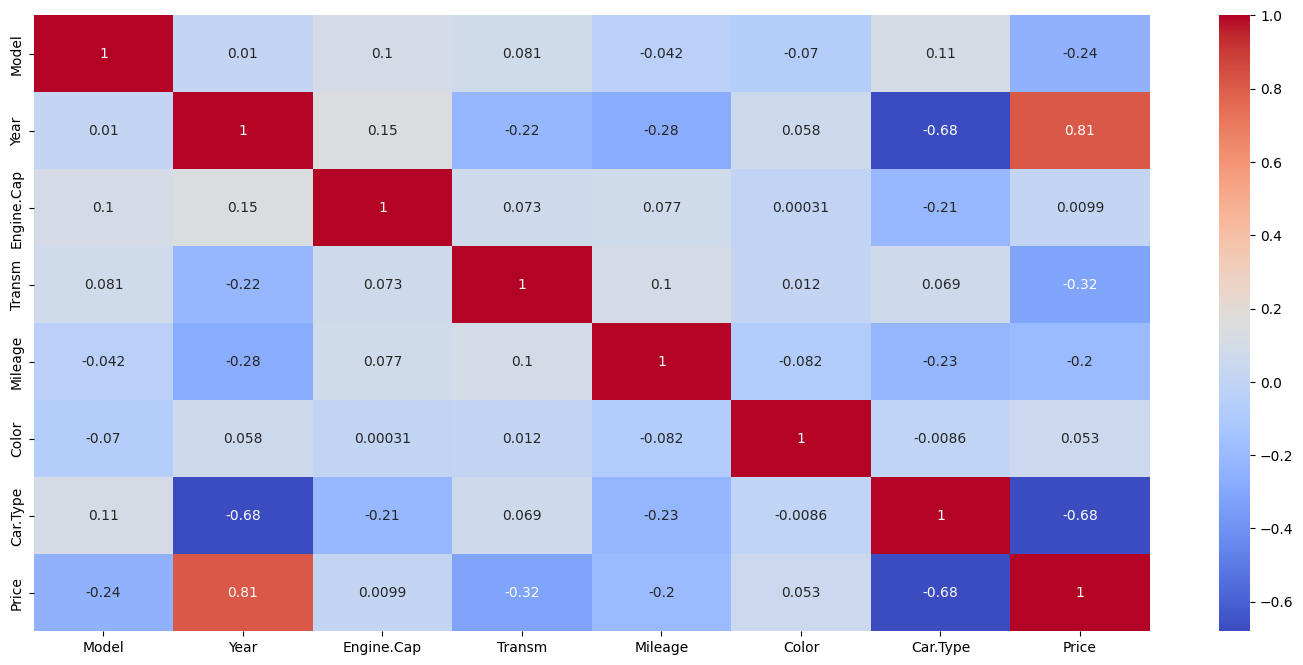

In [192]:
# visualize relationships between features and price
# check numerical columns
numeric_cols = df.select_dtypes(include=np.number)
numeric_cols.columns

plt.figure(figsize=(18,8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.show()

**The highest correlation is Price with Year, 0.81**

Skewness of price: 1.03


Text(0.5, 0, 'Price')

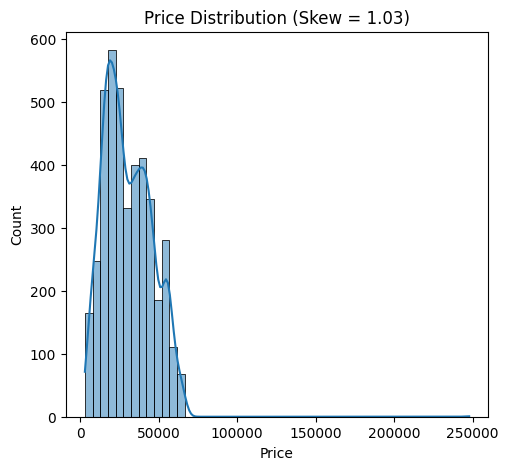

In [193]:
# analyze target variable (price) distribution and skewness
import seaborn as sns
from scipy.stats import skew

# Check skewness
price_skew = skew(df['Price'])
print(f"Skewness of price: {price_skew:.2f}")

# Plot distribution
plt.figure(figsize=(12, 5))

# Histogram + KDE
plt.subplot(1, 2, 1)
sns.histplot(df['Price'], kde=True, bins=50)
plt.title(f'Price Distribution (Skew = {price_skew:.2f})')
plt.xlabel('Price')

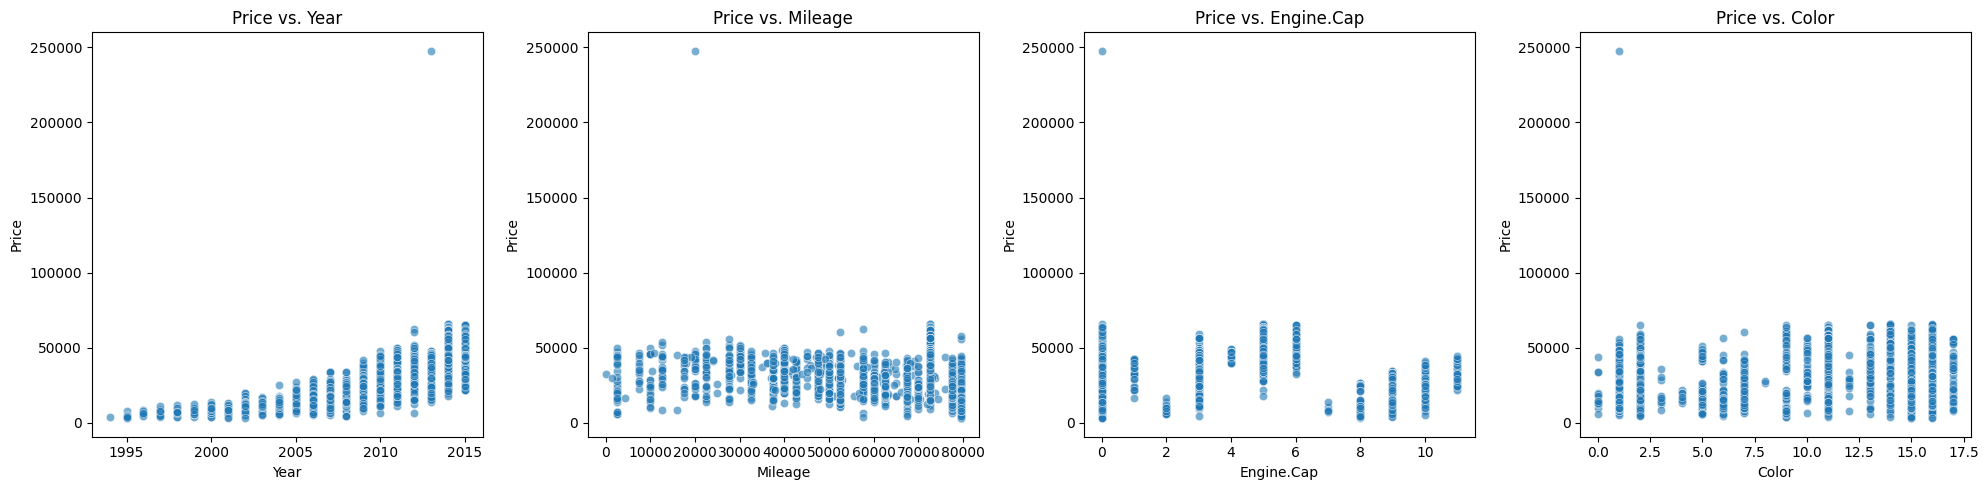

In [194]:
# scatter plot of features to Price
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# List of numerical features to plot
numerical_features = ['Year', 'Mileage', 'Engine.Cap', 'Color']

# Remove 'price' if accidentally included
numerical_features = [col for col in numerical_features if col in df.columns and col != 'price']

# Plot scatter plots
fig, axes = plt.subplots(1, len(numerical_features), figsize=(5 * len(numerical_features), 5))

if len(numerical_features) == 1:
    axes = [axes]

for i, col in enumerate(numerical_features):
    sns.scatterplot(x=df[col], y=df['Price'], ax=axes[i], alpha=0.6)
    axes[i].set_title(f'Price vs. {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Price')

plt.tight_layout()
plt.show()

# Model Training

**R2: higher is better<br>MSE/MAE/RMSE: lower is better**


## 1. Linear Regression

In [195]:
from sklearn.model_selection import train_test_split

# data splitting
feature = ['Year']
target = 'Price'

X = df[feature]
y = df[target]

# 80% train set, 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)

In [196]:
X_train.shape

(3332, 1)

In [197]:
X_test.shape

(833, 1)

In [198]:
# linear reg model training
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()

#fitting = learning from the training set

model_linear.fit(X_train, y_train)

#predicting

y_pred = model_linear.predict(X_test)

In [199]:
# evaluation
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

print('R2 Score: ', r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.5688015626259091
MSE:  118546656.92104197
MAE:  6583.643196504114
RMSE:  10887.91334099615


## 2. Multiple Linear Regression

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

feature = ['Model', 'Year', 'Color', 'Engine.Cap'] # select all the highest correlative
target = 'Price'

X = df[feature]
y = df[target]

# Step 1: Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_multilinear = LinearRegression()

# training
model_multilinear.fit(X_train, y_train)

# predict
y_pred = model_multilinear.predict(X_test) # which later can be used to compare y_pred with y_test

# evaluation
print("R2 Score:", r2_score(y_test, y_pred)*100)
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 77.03998725024894
MSE: 53138065.10242495
MAE: 5395.278946436077
RMSE:  7289.586072091127


## 3. Random Forest

In [201]:
from sklearn.ensemble import RandomForestRegressor

model_RF = RandomForestRegressor()

# training
model_RF.fit(X_train, y_train)

# predict
y_pred = model_RF.predict(X_test) # which later can be used to compare y_pred with y_test

# evaluation
print("R2 Score:", r2_score(y_test, y_pred)*100)
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 91.98920676607992
MSE: 18539974.564723477
MAE: 2995.4658494368946
RMSE:  4305.807074721703


## 4. Decision Tree

In [202]:
from sklearn.tree import DecisionTreeRegressor

model_DT = DecisionTreeRegressor()

# training
model_DT.fit(X_train, y_train)

# predict
y_pred = model_DT.predict(X_test) # which later can be used to compare y_pred with y_test

# evaluation
print("R2 Score:", r2_score(y_test, y_pred)*100)
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 91.87204720052368
MSE: 18811125.66075087
MAE: 3056.1729149568328
RMSE:  4337.179459135957


In [203]:
models = {
    'Simple Linear Regression': model_linear,
    'Multiple Linear Regression': model_multilinear,
    'Random Forest Regressor': model_RF,
    'Decision Tree Regressor': model_DT,
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results[name] = {'R2 Score': r2, 'MSE': mse, 'MAE': mae, 'RMSE': rmse}
    print(f'{name}:')
    print(f'R2 Score: {r2*100}')
    print(f'MSE: {mse}')
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    print('\n')

# Find the best model based on R2 Score
best_model_name = max(results, key=lambda k: results[k]['R2 Score'])
print(f'The best model based on R2 Score is: {best_model_name} with R2 Score of {results[best_model_name]["R2 Score"]*100:.2f}%')

Simple Linear Regression:
R2 Score: 77.03998725024894
MSE: 53138065.10242495
MAE: 5395.278946436077
RMSE: 7289.586072091127


Multiple Linear Regression:
R2 Score: 77.03998725024894
MSE: 53138065.10242495
MAE: 5395.278946436077
RMSE: 7289.586072091127


Random Forest Regressor:
R2 Score: 92.06427290873587
MSE: 18366243.407911126
MAE: 3001.5393773711507
RMSE: 4285.585538512926


Decision Tree Regressor:
R2 Score: 91.88705323099722
MSE: 18776396.088388596
MAE: 3049.4782370856847
RMSE: 4333.1739047017945


The best model based on R2 Score is: Random Forest Regressor with R2 Score of 92.06%
Random Forest Regressor:
R2 Score: 92.06427290873587
MSE: 18366243.407911126
MAE: 3001.5393773711507
RMSE: 4285.585538512926


Decision Tree Regressor:
R2 Score: 91.88705323099722
MSE: 18776396.088388596
MAE: 3049.4782370856847
RMSE: 4333.1739047017945


The best model based on R2 Score is: Random Forest Regressor with R2 Score of 92.06%


# Deployment

This notebook trains multiple regression models and selects the best model by R2 score.
To make the chosen model available for a lightweight interactive demo, we save the best model to disk (Joblib) and load it from a small Gradio app (`app_gradio.py`) in the project root.

Notes:
- The Gradio demo expects the model to be saved as `best_model.joblib`.
- The demo currently uses the features: `Model`, `Year`, `Color`, `Engine.Cap` (these are the features used in the notebook's multiple regression / comparison section). If you change feature columns, update `app_gradio.py` accordingly.

In [204]:
# Save the best model to disk so external apps (e.g., Gradio) can load it.
import joblib

# Retrieve the best model object from the `models` dictionary
try:
    best_model = models[best_model_name]
    joblib.dump(best_model, 'best_model.joblib')
    print(f'Saved best model ({best_model_name}) to best_model.joblib')
except Exception as e:
    print('Could not save best model automatically. Make sure `models` and `best_model_name` exist and are fitted.')
    print('Error:', e)

# Save label encoders (if present) so external apps can map human-readable categories
try:
    joblib.dump(encoders, 'encoders.joblib')
    print('Saved encoders to encoders.joblib')
except Exception as e:
    print('No `encoders` dict found or could not save encoders:', e)

Saved best model (Random Forest Regressor) to best_model.joblib
Saved encoders to encoders.joblib


In [205]:
import os
import joblib
import pandas as pd
import numpy as np
import gradio as gr

# Feature columns used by the notebook's final comparison (adjust if you changed features)
FEATURE_COLS = ['Model', 'Year', 'Color', 'Engine.Cap']


def load_model(path='best_model.joblib'):
    if not os.path.exists(path):
        raise FileNotFoundError(
            f"Model file '{path}' not found. Run the notebook cell that saves the best model to 'best_model.joblib' and ensure it's in the project root."
        )
    return joblib.load(path)


try:
    model = load_model()
except Exception as exc:
    model = None
    load_error = str(exc)
else:
    load_error = None

# Try to load encoders (saved from the notebook) if available
encoders = None
enc_load_error = None
if os.path.exists('encoders.joblib'):
    try:
        encoders = joblib.load('encoders.joblib')
    except Exception as e:
        enc_load_error = str(e)


def predict_price(model_name: str, year: float, color: str, engine_cap: float):
    """
    Simple wrapper to predict price for a single example.
    NOTE: Categorical columns must be encoded the same way as during training (LabelEncoder mapping).
    If you used different features, update FEATURE_COLS accordingly.
    """
    if model is None:
        return f"Model not loaded: {load_error}"

    # Encode model name if we have encoders
    model_encoded = None
    if encoders is not None and 'Model' in encoders:
        try:
            model_encoded = encoders['Model'].transform([model_name])[0]
        except Exception:
            return f"Unknown model '{model_name}'. Allowed values: {list(encoders['Model'].classes_)}"
    else:
        try:
            model_encoded = float(model_name)
        except Exception:
            return "No encoder available for 'Model' and provided value is not numeric. Save encoders.joblib from the notebook."

    # Encode color if we have encoders and the color is given as a string
    color_encoded = None
    if encoders is not None and 'Color' in encoders:
        try:
            color_encoded = encoders['Color'].transform([color])[0]
        except Exception:
            try:
                color_encoded = float(color)
            except Exception:
                allowed = list(encoders['Color'].classes_)
                return f"Unknown color '{color}'. Allowed values: {allowed}"
    else:
        try:
            color_encoded = float(color)
        except Exception:
            return "No encoder available and color value is not numeric. Save encoders.joblib from the notebook."

    X = pd.DataFrame([[model_encoded, year, color_encoded, engine_cap]], columns=FEATURE_COLS)
    pred = model.predict(X)[0]
    return float(np.round(pred, 2))


def batch_predict(csv_file):
    """Accepts a CSV file with the same feature columns and returns predictions appended."""
    if model is None:
        return f"Model not loaded: {load_error}"

    df = pd.read_csv(csv_file.name)
    missing = [c for c in FEATURE_COLS if c not in df.columns]
    if missing:
        return f"Uploaded CSV is missing required columns: {missing}"

    # If Color column contains strings and we have an encoder, transform it
    if 'Color' in df.columns and df['Color'].dtype == object:
        if encoders is None or 'Color' not in encoders:
            return "Uploaded CSV contains string Color values but no `encoders.joblib` was found. Save encoders from the notebook."
        # check for unknown labels
        unknowns = set(df['Color'][~df['Color'].isin(encoders['Color'].classes_)])
        if len(unknowns) > 0:
            return f"Uploaded CSV contains unknown Color labels: {list(unknowns)}. Allowed: {list(encoders['Color'].classes_)}"
        # safe to transform
        df['Color'] = encoders['Color'].transform(df['Color'])

    preds = model.predict(df[FEATURE_COLS])
    df['predicted_price'] = np.round(preds, 2)
    return df


title = "Malaysia Car Price Predictor"
description = (
    "Enter the features used by the model or upload a CSV containing the same columns (Model, Year, Color, Engine.Cap).\n"
)

iface_single = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Textbox(label='Model', value=''),
        gr.Number(label='Year', value=2016),
        gr.Textbox(label='Color', value=''),
        gr.Number(label='Engine.Cap', value=1600),
    ],
    outputs=gr.Number(label='Predicted Price (RM)'),
    title=title,
    description=description,
)


def main():
    # Launch single-prediction demo (no tabs)
    iface_single.launch(share=True)


if __name__ == '__main__':
    main()


* Running on local URL:  http://127.0.0.1:7861
* Running on public URL: https://f0be9153fb96fc398b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
* Running on public URL: https://f0be9153fb96fc398b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Created dataset file at: .gradio\flagged\dataset2.csv
